# **Tugas 3**

## Algoritma Genetika

Penggunaan algoritma genetika untuk permasalahan Travelling Salesman Problem (TSP)

### Import Modul

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### Pembuatan function untuk generate koordinat kota, jumlah populasi dan individu

In [ ]:
def generateCoordCity(numOfCity):
    temp = np.zeros((numOfCity, 2)) + 1000
    count = 0
    while count < numOfCity:
        x = np.random.randint(50)
        y = np.random.randint(50)
        if [x, y] not in temp:
            temp[count, :] = [x, y]
            count += 1
    return temp

In [ ]:
def generateIndividu(numOfCity):
    ind = np.zeros(numOfCity, dtype=int) + 1000
    count = 0
    while count < numOfCity:
        temp = np.random.randint(numOfCity)
        if temp not in ind:
            ind[count] = temp
            count += 1
    return ind

In [ ]:
def generatePopulation(numOfPopulation, numOfCity):
  population = []
  for i in range(numOfPopulation):
      population.append(generateIndividu(numOfCity))
  
  return np.array(population), generateCoordCity(numOfCity);

### Testing function generatePopulation

In [ ]:
(population, location) = generatePopulation(6, 8)
print("populasi=\n", population)
print("koordinat kota=\n", location)

populasi=
 [[5 6 3 0 1 7 4 2]
 [5 2 0 3 7 1 4 6]
 [2 6 0 7 3 4 5 1]
 [2 3 7 0 5 6 4 1]
 [6 2 7 3 4 5 1 0]
 [5 0 2 7 3 6 4 1]]
koordinat kota=
 [[41. 48.]
 [24.  6.]
 [48.  0.]
 [33. 44.]
 [21. 22.]
 [13. 45.]
 [31. 39.]
 [16. 28.]]


### Function Seleksi

In [ ]:
def selection(fitness):
    # hitung probabilitas masing-masing individu
    totalFitness = np.sum(fitness)
    probIndividu = fitness / totalFitness
    numOfIndividu = fitness.shape[0]
    # hitung komulatif untuk ruang pada roulette wheel
    komulatif = np.zeros(numOfIndividu + 1)
    newP = np.zeros(numOfIndividu, dtype=int)
    # hitung ruang pada roulette wheel
    for i in range(numOfIndividu):
        komulatif[i+1] = komulatif[i] + probIndividu[i]


    count = 0
    for j in range(numOfIndividu):
        roulette = np.random.rand(1)
        for i in range(numOfIndividu + 1):
            if roulette > komulatif[i] and roulette <= komulatif[i + 1]:
                newP[count] = i
                count += 1
    
    # membuat roulette wheel dengan matplotlib
    fig, ax = plt.subplots()
    ax.pie(
        probIndividu, 
        labels=np.arange(0, numOfIndividu),
        autopct=lambda pct: "{:.1f}%".format(pct)
    )
    fig.show()

    # kembalikan nilai kromosom yang terpilih
    return newP

In [ ]:
def newP(ind, population):
    newPopulation = np.zeros_like(population)
    numOfIndividu = ind.shape[0]
    for i in range(numOfIndividu):
        newPopulation[i,:] = population[ind[i], :]
    return newPopulation

### Function untuk menghitung fitness

In [ ]:
def calculateFitness(population, coordinat):
    # hitung probabiitas masing-masing kromosom
    (numOfIndividu, numOfCity) = population.shape
    fitness = np.zeros(numOfIndividu)
    for j in range(numOfIndividu):
        temp = 0.0
        for i in range(numOfCity - 1):
            temp += np.sum(np.square(coordinat[population[j,i]] - coordinat[population[j, i + 1]] ))
        fitness[j] = 1/np.sqrt(temp)
    return fitness

### Function Crossover

In [ ]:
def reverse(population):
    newPopulation = population.copy()
    (numOfIndividu, numOfCity) = population.shape
    for j in range(numOfIndividu):
        ind1 = np.random.randint(numOfCity)
        ind2 = np.random.randint(numOfCity)
        if ind1 <= ind2:
            temp = ind2
            for i in range(ind1, ind2 + 1):
                newPopulation[j, i] = population[j, temp]
                temp -= 1
        else:
            temp = ind1
            for i in range(ind2, ind1 + 1):
                newPopulation[j, i] = population[j, temp]
                temp -= 1
    
    return newPopulation

### Function Mutasi

In [ ]:
def mutation(population):
    newPopulation = population.copy()
    (numOfIndividu, numOfCity) = population.shape
    for i in range(numOfIndividu):
        ind1 = np.random.randint(numOfCity)
        ind2 = np.random.randint(numOfCity)
        newPopulation[i, ind1] , newPopulation[i, ind2] = newPopulation[i, ind2], newPopulation[i, ind1]
    return newPopulation

### Visualisasi Algoritma Genetika

In [ ]:
def create_plot(population, location):
    row = population.shape[0]
    col = population.shape[1]
    fig, axs = plt.subplots(1, row, constrained_layout=True, figsize=(16, 4))
    for i in range(row):
        ind = population[i]
        axs[i].plot(location[ind, 0].flatten(), location[ind, 1].flatten())
        axs[i].scatter(location[:, 0].flatten(), location[:, 1].flatten(), s=100)
        for j in np.arange(0, location.shape[0]):
            axs[i].annotate(j, (location[:, 0].flatten()[j], location[:, 1].flatten()[j]))
        axs[i].set_title("k-%d"%(i+1))
        axs[i].set_xlim([0, 50])
        axs[i].set_ylim([0, 50])
    



def GA(numOfPopulation, numOfCity, generation):
    (population, location) = generatePopulation(numOfPopulation, numOfCity)

    # create data visualization
    fig, ax = plt.subplots()
    ax.scatter(location[:, 0].flatten(), location[:, 1].flatten(), s=100)
    for i in np.arange(0, numOfCity):
        ax.annotate(i, (location[:, 0].flatten()[i], location[:, 1].flatten()[i]))
    ax.set_title("Koordinat Kota")
    ax.set_xlim([0, 50])
    ax.set_ylim([0, 50])
    fig.show()

    print("inisialisai populasi=\n", population)
    for i in range(generation):
        print("Generasi -", i)
        nilaiFitness = calculateFitness(population, location)
        maxFitness = np.argmax(nilaiFitness) + 1
        newInd = selection(nilaiFitness)
        print("indeks populasi hasil seleksi",newInd)
        population = newP(newInd, population)
        print("individu hasil seleksi\n",population)
        population = reverse(population)
        print("Hasil crossover\n",population)
        population = mutation(population)
        print("Hasil mutasi\n",population)

        create_plot(population, location)
        print("K -",maxFitness)

inisialisai populasi=
 [[2 3 1 4 0]
 [3 4 1 2 0]
 [3 4 1 2 0]
 [4 2 3 1 0]]
Generasi - 0
indeks populasi hasil seleksi [3 3 2 3]
individu hasil seleksi
 [[4 2 3 1 0]
 [4 2 3 1 0]
 [3 4 1 2 0]
 [4 2 3 1 0]]
Hasil crossover
 [[2 4 3 1 0]
 [1 3 2 4 0]
 [3 1 4 2 0]
 [4 1 3 2 0]]
Hasil mutasi
 [[2 1 3 4 0]
 [4 3 2 1 0]
 [3 0 4 2 1]
 [4 1 3 0 2]]
K - 4


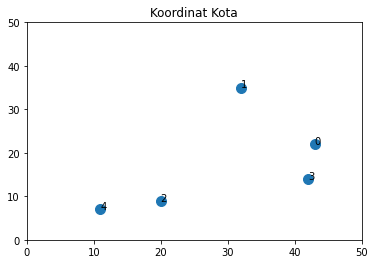

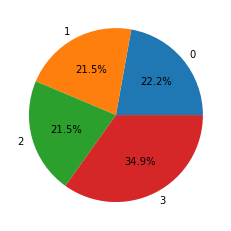

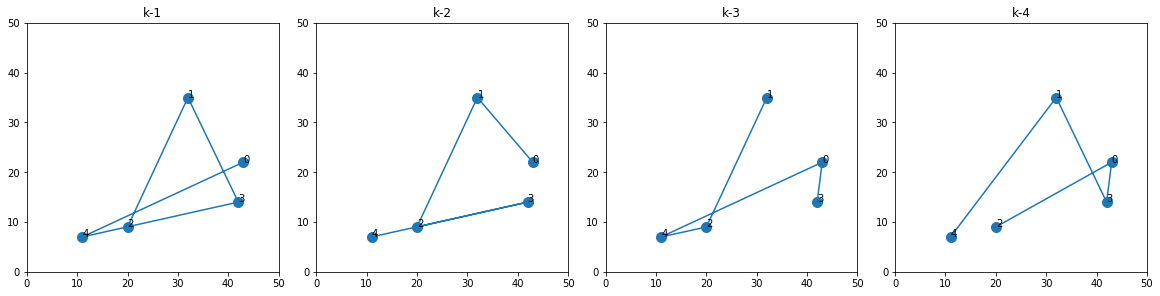

In [ ]:
GA(4, 5, 1)